In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [84]:
ds = pd.read_csv(r'C:\Users\jmfra\OneDrive\Documents\Thinkful Data Science Files\1.5.1 data\armenian_pubs.csv')

In [85]:
#First thing we have to clean the data a little and make it more readable in the open ended categories.
#certain answers left questions with open answers so I interpreted them and added them to categories
ds = ds.drop('Timestamp', axis=1)
ds['Occupation'] = ds.Occupation.str.strip()
ds['Fav_Pub'] = ds.Fav_Pub.str.strip()
ds['Fav_Pub'] = ds.Fav_Pub.str.lower()
ds['Fav_Pub'] = ds.Fav_Pub.str.replace('^the ','')
ds['Fav_Pub'] = ds.Fav_Pub.str.replace('i have none','do not have one')
ds['Fav_Pub'] = ds.Fav_Pub.str.replace('37 pub','pub 37')
ds['Freq'] = ds.Freq.str.replace('Several times in a month','Sometimes')
ds['Freq'] = ds.Freq.str.replace('^rarely.+','Rarely')
ds['Freq'] = ds.Freq.str.replace('Several times a week','Often')
ds['Lifestyle'] = ds.Lifestyle.str.strip()
ds['Lifestyle'] = ds.Lifestyle.str.replace('^Adventur.+','Adventurous')
ds['Lifestyle'] = ds.Lifestyle.str.replace('^Busy.+','Busy')
ds['Lifestyle'] = ds.Lifestyle.str.replace('^Rock.+','Musical')
ds['Lifestyle'] = ds.Lifestyle.str.replace('^Business.+','Active')
ds['Lifestyle'] = ds.Lifestyle.str.replace('^Sport\,.+','Active')
ds['Lifestyle'] = ds.Lifestyle.str.replace('^Art','Artsy')
print(ds)

     Age  Gender    Income         Occupation             Fav_Pub      WTS  \
0     19    Male  100000.0            Student             station   2000.0   
1     19  Female   50000.0            Student             calumet   2000.0   
2     20    Male  100000.0            Student             liberty   3000.0   
3     18    Male       0.0            Student             calumet   3000.0   
4     19  Female  130000.0  Student + working             liberty  10000.0   
5     19    Male   90000.0            Student             station   2000.0   
6     18  Female       0.0            Student               irish   1000.0   
7     19  Female       0.0            Student             station   2000.0   
8     19    Male   80000.0  Student + working   i don't like pubs  10000.0   
9     19    Male  150000.0            Student               irish   3000.0   
10    20  Female   80000.0            Student   i don't like pubs   3000.0   
11    18    Male   90000.0            Student               venu

At First Look

This data set shows how people in a local town  responded when asked a few questions about their prefereances in bars in a specific local area. Based on the questions asked, it would be easy to extract some demographics of the people in the survey and correlate their answers based on those. If you take a look below at the favorite pub data, you can see that over 50% of the entries favored five out of thirty options. I believe if used correctly this data set could provide some information to help the bar owners in the area improve their bars in a way that speaks to the local demographics in order to drive up foot traffic and potentially sales. 

RFC Hypothesis

If we take data from this set and add a wider range of ages, as well as a higher sample of all ages, we can test for a corrlelation between a lot of the variables and willingness to spend. This could be useful to help bars in this area attract a clientele willing to spend the most amount of money. We would expect willingness to spend to go up as people get older and then hit a peak around middle age and drop back down again. We would expect income to increase directly with willingness to spend. We would expect men to spend more money than women. We would expect people who are working to spend more than students and so on.

Text(0,0.5,'Count')

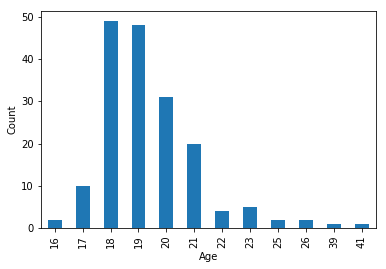

In [86]:
#we need to seperate the data by column and look at the demographics of the current answers to see how we can improve the survey
#in order to use it for the goal/hypothesis
age = ds.groupby('Age').size()
ageplot = age.plot.bar()
ageplot.set_ylabel('Count')

In [87]:
#as you can see above, the data is very heavily weighted towards late teen-early 20s 
gender = ds.groupby('Gender').size()
print(gender)

Gender
Female    102
Male       73
dtype: int64


In [88]:
income1 = ds.groupby(pd.cut(ds['Income'], np.arange(0,225000,25000), include_lowest=True)).size()
income2 = ds.groupby(pd.cut(ds['Income'], np.arange(200000,1100000,100000))).size()
income3 = ds.groupby(pd.cut(ds['Income'], np.arange(1000000,4600000,3500000))).size()
print(income1, income2, income3)

Income
(-0.001, 25000.0]       56
(25000.0, 50000.0]      30
(50000.0, 75000.0]      18
(75000.0, 100000.0]     30
(100000.0, 125000.0]     6
(125000.0, 150000.0]    10
(150000.0, 175000.0]     1
(175000.0, 200000.0]    11
dtype: int64 Income
(200000, 300000]     6
(300000, 400000]     2
(400000, 500000]     0
(500000, 600000]     0
(600000, 700000]     1
(700000, 800000]     0
(800000, 900000]     2
(900000, 1000000]    0
dtype: int64 Income
(1000000, 4500000]    1
dtype: int64


In [89]:
#there are a lot more entries at much lower income brackets but without knowing the overall demographics of the area
#it is hard to say if this represents the population well or not
occupation = ds.groupby('Occupation').size().sort_values(ascending=False)
print(occupation)

Occupation
Student                             122
Student + working                    40
Working                              10
army                                  1
Entrepreneur / Software Engineer      1
CEO                                   1
dtype: int64


In [90]:
favorite_pub = ds.groupby('Fav_Pub').size().sort_values(ascending = False)
print(favorite_pub)

Fav_Pub
calumet               27
station               26
i don't like pubs     16
irish                 16
pepper                10
cantaloupe             9
venue                  8
liberty                7
pub 37                 6
tom collins            4
bulldog                3
das                    3
hemingway              3
fiction                3
bob's                  2
do not have one        2
ulixanyan art club     2
paulaner               2
paparazzi              2
beatles                2
void                   2
beer academy           1
dargett                1
yankee                 1
eden                   1
kaptyorka              1
wild west              1
pechenu bagher         1
pub 007                1
red bull               1
simona                 1
speak easy             1
varonna                1
barcode                1
dtype: int64


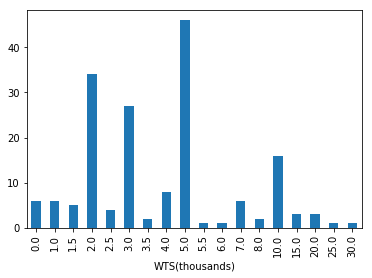

In [91]:
#as you can see a lot of the pubs are not very well represented in this study, implying that either the study was weighted towards
#certain bars or that those bars are just that much more popular
ds=ds.rename(columns = {'WTS':'WTS(thousands)'})
ds['WTS(thousands)'] = ds['WTS(thousands)'] / 1000
willingness_to_spend = ds.groupby('WTS(thousands)').size()
willingness_to_spend.plot.bar()

In [92]:
frequency = ds.groupby('Freq').size()
print(frequency)

Freq
Often        20
Rarely       94
Sometimes    61
dtype: int64


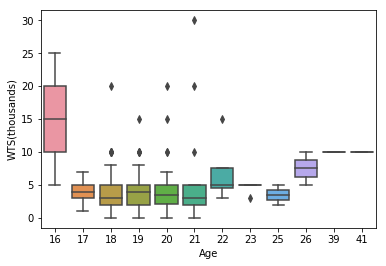

In [93]:
#it is not good that over half the responders rarely go to bars at all. Implies the people in this sample do not represent the 
#population we are trying to target 
ax = sns.boxplot(x='Age', y='WTS(thousands)', data=ds.reset_index())

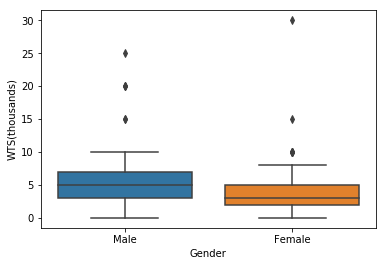

In [94]:
ax = sns.boxplot(x='Gender', y='WTS(thousands)', data=ds)

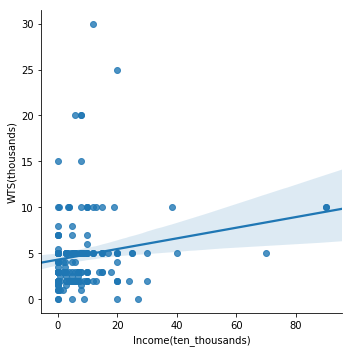

In [95]:
ds['Income(ten_thousands)'] = ds['Income'] / 10000
ds = ds.sort_values(by = 'Income', ascending = False)
ds = ds.drop(ds.index[0])
ax = sns.lmplot(y='WTS(thousands)', x='Income(ten_thousands)', data=ds)

Data Summary

After a short look at the data entries and some base correlations, we can identify a few issues with the data. First of all, the sample sizes are way too small to get an average read of a downtown area. The largest age block is less than fifty people and a majority of the ages have a sample size of below twenty. Not only that, but there are huge gaps after the age of twenty six which will definitely skew the data because there is no way the demographic of bar going patrons in any area are 98+% under twenty six. In order to make this set useful, we will need to update the study laid out in the experiment section below

Business Value

As stated earlier, businesses in the area seem to be either missrepresented in this study, or there is a large skew of people going to particular venues. By updating the data, we can use correlations between demographics in order to help the smaller, less popular businesses find out the exact reasons why they are not bringing in as large a crowd as their competitors. At first look, the category WTS, which stands for willingness to sell, is among the most important. Without actually looking at the books of each bar, we can use this metric to estimate how much each bar can make by targeting certain crowds. For example, targeting seventeen year olds might be good to increase the number of people spending time in your bar, but might lower your revenue because this demographic spends a lot less than others. By correlation WTS to all the other categories, bars can see exactly what group of people will increase revenue and what those people are intrerested in.

RFC Experiment 

Most of the experiment is identical to what has already been done, except with more trials. Based on the data provided, and the purpose of the test, it is clear more peoplefo all age groups need to be included in order to accurately representthe population. In person representatives could go to bars represented in this study and try to get people to answer the questionnaire in exchange for entry to win some sort of cash prize. They should also be intrusive instea of allowing people to come to them in order to get not only the most respondants, but also to stop any skew in the data because a particular demographic is more outgoing. While people who do not usually go to bars can be useful in some areas, it might also be important to cut out the people who replied that they do not like pubs because they are not the people who the owners are targeting. These people usually do not want to come any way and are unlikely to increase frequency with changes. 

RFC Success

The goal of this increased study size is to help local bars in the area understand the demographics and use this to increase sales or traffic. Success is achieved by pulling data with clear correlations no matter what that actual correlation is. We are even more successful if the data matches our predictions in each category because we can then use logic to explain the correlation and use the information. If the data shows high r-values from t-tests and linear regressions, where necessary, above .05 then we would call this RFC a failure because it is hard to target specific demographics if you are not sure if the correlations are random or by the product of actual correlations.